In [6]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_153.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_341.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_127.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_119.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_107.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_204.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_672.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_172.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_115.png
/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/normal/normal_17.png
/

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

2023-05-03 16:51:39.562063: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 16:51:39.604319: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 16:51:39.605273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 16:51:40.494556: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
train_path = '/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/'
# test_path = '/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/dataset1/unknown_images/'

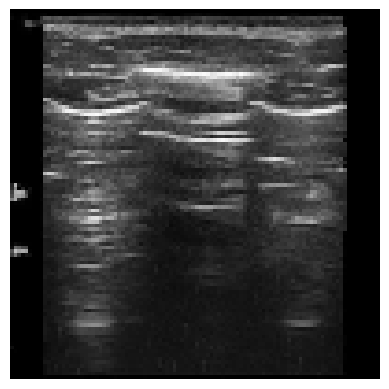

In [9]:
img = load_img(train_path + "normal/normal_0.png", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()


In [10]:
images = ['sick', 'normal']


In [25]:
# split data into train and test set
import splitfolders

image_directory= '/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/known_images/'
splitfolders.ratio(image_directory, output="/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/",
        seed=42, ratio=(0.7, 0.3), group_prefix=None, move=False) # default values

Copying files: 715 files [00:00, 3907.33 files/s]


In [60]:
train = '/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/train/'
test = '/home/joshard/jupyter_env/files/deep_learn/deep_learning_project/val/'

In [61]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [62]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

2


# Cnn Model

In [63]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))


In [64]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 activation_15 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_16 (Activation)  (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                 

In [66]:
batch_size = 32

# Data Augmentation

In [67]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 499 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [68]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 160 // batch_size,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 80 // batch_size)

Epoch 1/50


/tmp/ipykernel_3277/2031776193.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,
2023-05-03 19:38:10.831268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - ETA: 0s - loss: 1.5640 - accuracy: 0.5374

2023-05-03 19:38:13.132514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 3s 427ms/step - loss: 1.5640 - accuracy: 0.5374 - val_loss: 0.6478 - val_accuracy: 0.7812
Epoch 2/50
5/5 [==============================] - 2s 420ms/step - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6864 - val_accuracy: 0.4531
Epoch 3/50
5/5 [==============================] - 2s 358ms/step - loss: 0.5428 - accuracy: 0.8095 - val_loss: 0.7294 - val_accuracy: 0.5156
Epoch 4/50
5/5 [==============================] - 2s 392ms/step - loss: 0.4854 - accuracy: 0.7875 - val_loss: 0.2826 - val_accuracy: 0.8594
Epoch 5/50
5/5 [==============================] - 2s 362ms/step - loss: 0.5134 - accuracy: 0.7415 - val_loss: 0.4035 - val_accuracy: 0.8750
Epoch 6/50
5/5 [==============================] - 2s 396ms/step - loss: 0.5179 - accuracy: 0.7375 - val_loss: 0.3552 - val_accuracy: 0.9531
Epoch 7/50
5/5 [==============================] - 2s 382ms/step - loss: 0.4832 - accuracy: 0.7625 - val_loss: 0.3377 - val_accuracy: 0.8125
Epoch 8/50
5/5 [===============

In [69]:
#model.save_weights("example.h5")

In [70]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Train-Validation Loss

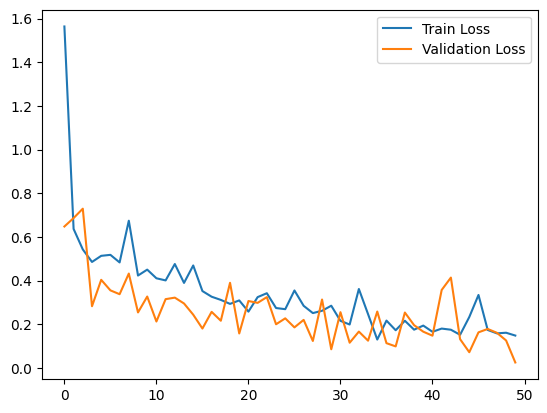

In [71]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# Train-Validation Accuracy

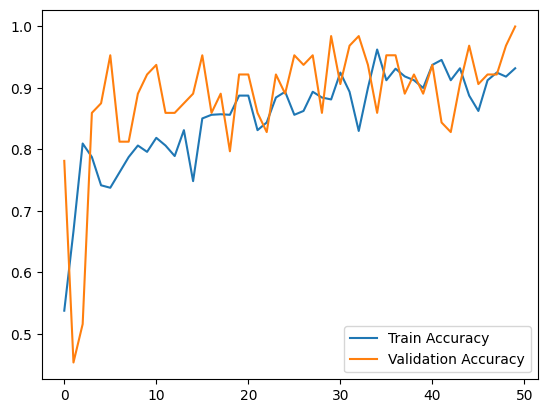

In [72]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()